In [38]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [39]:
plt.style.use('fivethirtyeight')

In [40]:
headers = {
    'authority': 'query1.finance.yahoo.com',
'method': 'GET',
'path': '/v8/finance/chart/QCOM?symbol=QCOM&period1=1535997856&period2=1571552128&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=DyVbyPAh6W5&corsDomain=finance.yahoo.com',
'scheme': 'https',
'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
'cache-control': 'no-cache',
'cookie': 'APID=UP6e5b7010-bd11-11e8-a127-0681626d5a50; F=d=yDZXJdg9vLUbket1il3yfZQzCzexrWjoO8hhbh4Mr1mVewXPom5GkQ--; AO=u=1; Y=v=1&n=7nlvtglt01snk&l=ux2t12z1w5wxvsqv21s4uw3yv20s5tuu/o&p=028000000000000&r=qh&intl=us; GUC=AQEAAQJdb7xeOEIcMAQY&s=AQAAAMblUZRX&g=XW5uZw; B=ag7016tdl1sf3&b=4&d=1H9k4hlpYEKy5D5ESD1yzg--&s=uk&i=NY5qZtVFDduwOvV7c6Js; T=z=n5mbdBn5mbdB6E1JVs09Oy.MzUwNQYzMk81MzY1MTRPMDExTj&a=QAE&sk=DAA0D4SUrBO8wY&ks=EAATmeh3S36KFVy_W6RtY8.KA--~G&kt=EAAYNVqs1uglRNsGUCczudoVA--~I&ku=FAAkjhYmjzMRQsIUcSQN2vlC9MHYtbt566n0z9BTNhRjVOb4XsGaASJ2Tlb70eDLnJFvBhFmMlK.CAcRMsFfMxvrE8YEzvnskh0_EezrLR1.pxncrqdblJz3i7BWxk.T3nHrpwVwwj.jQm8uWfjZwxpd6VfUng.DwaNkBNGBdoC3qg-~A&d=bnMBeWFob28BZwFVM0U0VFI1SVE0TExDUFY3TU1EQzRTU1NVVQFhAVFBRQFhYwFBTUJVWF9CaAFsYXQBVDVtYmRCAWNzAQFhbAFodWdvamRvbGFuQGdtYWlsLmNvbQFzYwFkZXNrdG9wX3dlYgFmcwFEZXAuWFhSZGJtNGUBenoBVDVtYmRCQTdFAXNsAU5ESTNNZ0UwTlRneU5ERXlOak00TnpZMk9UTTRNVEUt&af=JnRzPTE1Njc1MTgzMTEmcHM9MnFqTUpkVGlRLlpaazNQX2poVURrQS0t; PH=fn=aBa73.MQBMkDK9ptag--&l=en-US&i=us; PRF=t%3DFTEC%252BFNCL%252BADSK%252B%255EVIX%252BFB%252BGPRO%252BXLK%252BACN%252BV',
'pragma': 'no-cache',
'upgrade-insecure-requests': '1',
'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
}
import datetime
now = datetime.datetime.now()


In [41]:
  


def get_symbol_data_1_mo(symbol, offline=False): 
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/' + symbol + '?symbol='+ symbol +'&period1=1535997856&period2=1567519221&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=DyVbyPAh6W5&corsDomain=finance.yahoo.com'
    if offline:
        data = open("%s.txt" % symbol, "r")
        return data.read()
    
    return requests.get(url, headers=headers).text

# Dec 31 2018 1546214400

In [49]:



def get_quote_for_symbol(symbol, duration='1mo'):
    chart_data = json.loads(get_symbol_data_1_mo(symbol, offline=False))
    quote = pd.DataFrame(chart_data['chart']['result'][0]['indicators']['quote'][0])
    quote['timestamp'] = pd.to_datetime(chart_data['chart']['result'][0]['timestamp'], unit='s').normalize()
    quote = quote.set_index('timestamp')
    return quote

df = get_quote_for_symbol('SPY')
df.to_csv('sp500.csv', index=None)




In [43]:
# WEIGHTS = {
#     'MSFT': [0.1014], 
#     'CSCO': [0.1014], 
#     'ORCL': [0.0990], 
#     'SAP': [0.0467], 
#     'ADBE': [0.0454],
#     'CRM':[0.0410],
#     'IBM': [0.0303],
#     'VMW': [0.0299],
#     'INFY': [0.0227],
#     'WDAY': [0.0216],
# }

# COMPARISON = {
#     'AAPL': [0.0990], 
#     'FB': [0.0467], 
#     'GOOGL': [0.0454],
#     'INTC': [0.0303],
#     'NVDA': [0.0299],
#     'QCOM': [0.0227],
#     'MU': [0.0216],
#     'SHOP': [0.0216],
#     'ATVI': [0.0216],
#     'DELL': [0.0216],
# }

WEIGHTS = {
    'JPY=X': [1], 
    'SPY':[1],
    'UIV4.F':[1], #Eurostoxx 50
    'DAX':[1], # German Index
    'CL=F':[1], # Oil Futures
    'GC=F':[1], # Gold Futures
    'EURUSD=X':[1],
    '^TNX':[1] #US 10Y
} 
XLK = 'XLK'

In [44]:
def get_closes_for_weightings(WEIGHTS):
    QUOTES = {}

    for key in WEIGHTS:
        print(key)
        QUOTES[key] = get_quote_for_symbol(key)

    index_quote = get_quote_for_symbol(XLK)
    
    CLOSES = {}

    for key in QUOTES:
        CLOSES[key] = QUOTES[key]['close']
    
    CLOSES = pd.DataFrame(CLOSES)
    CLOSES['timestamp'] = QUOTES[key].index
    CLOSES = CLOSES.merge(right=pd.DataFrame(index_quote['close']),how='outer', left_index=True, right_index=True)
    n = pd.DataFrame(CLOSES.values)
    n.columns = CLOSES.columns
    CLOSES = n
    
    CLOSES = CLOSES.set_index('timestamp')
    
    return CLOSES

In [45]:
def calculate_weighted_percentage_changes(c, WEIGHTS, periods=10):
    c_n = c.pct_change(periods=periods).iloc[:,:-1]
    c_temp = c_n # Remove when uncomment
#     c_temp = pd.DataFrame(c_n.values * pd.DataFrame(WEIGHTS).values)
    c_temp.colums = c.columns[:-1]
    c_temp['INDEX'] = c['close'].pct_change()
    return c_temp.dropna()

In [37]:
CLOSES = get_closes_for_weightings(WEIGHTS)

JPY=X
SPY
UIV4.F


KeyError: 'timestamp'

In [64]:
CLOSES_COMPARISON = get_closes_for_weightings(COMPARISON)

GPRO
TIVO
RST
ENR
LPL
ZNGA
GDDY
TTWO
MTCH
TWTR


In [65]:
CLOSES.to_csv('./SMF/B2B.csv')
CLOSES_COMPARISON.to_csv('./SMF/B2C.csv')

In [21]:
YTD = True

def read_close_data(name_close, name_comparison, YTD=False):
    c = pd.read_csv('./SMF/%s' % name_close)
    c_comp = pd.read_csv('./SMF/%s' % name_comparison)
    c['timestamp'] = c['timestamp'].astype('datetime64')
    c_comp['timestamp'] = c_comp['timestamp'].astype('datetime64')
    c = c.set_index('timestamp')
    c_comp = c_comp.set_index('timestamp')

    if YTD:
        c = c[c.index >= '2018-12-31']
        c_comp = c_comp[c_comp.index >= '2018-12-31']
        
    return (c, c_comp)

HIGH_BETA, COMP_HIGH_BETA = read_close_data('B2B_HighBeta.csv','B2C_HighBeta.csv', YTD=YTD)
LOW_BETA, COMP_LOW_BETA = read_close_data('B2B.csv','B2C.csv', YTD=YTD)

# Create an equally weighted index of top 'B2B' businesses

In [22]:
def compute_log_returns(df, col, rename=None):
    df[col + '_DAILY'] = 0
    df[col + '_DAILY'].iloc[1:] = np.log((np.array(df[col].iloc[1:])/np.array(df[col].iloc[:-1])).astype('float64'))
    
    if rename is not None:
        df[rename + '_DAILY'] = df[col + '_DAILY']
        
    return df

def compute_performance(c, c_comp):
    c['B2B_IDX'] = c.iloc[:,:-1].sum(axis=1)
    c['B2C_IDX'] = c_comp.iloc[:,:-1].sum(axis=1)
    
    c['B2B_IDX_RETURNS'] = c['B2B_IDX'].pct_change() # Non log returns
    c['B2C_IDX_RETURNS'] = c['B2C_IDX'].pct_change()
    c['SPY_RETURNS'] = c['close'].pct_change()

    c['SPY_YTD'] = ((c['close'] / c['close'][0]) - 1)
    c['B2B_IDX_YTD'] = ((c['B2B_IDX'] / c['B2B_IDX'][0]) - 1)
    c['B2C_IDX_YTD'] = ((c['B2C_IDX'] / c['B2C_IDX'][0]) - 1) 

    c = compute_log_returns(c, 'B2B_IDX')
    c = compute_log_returns(c, 'B2C_IDX')
    c = compute_log_returns(c, 'close', rename='SPY_YTD')
    
    return c

LOW_BETA = compute_performance(LOW_BETA, COMP_LOW_BETA)
HIGH_BETA = compute_performance(HIGH_BETA, COMP_HIGH_BETA)

# Performance Metrics 1 Year

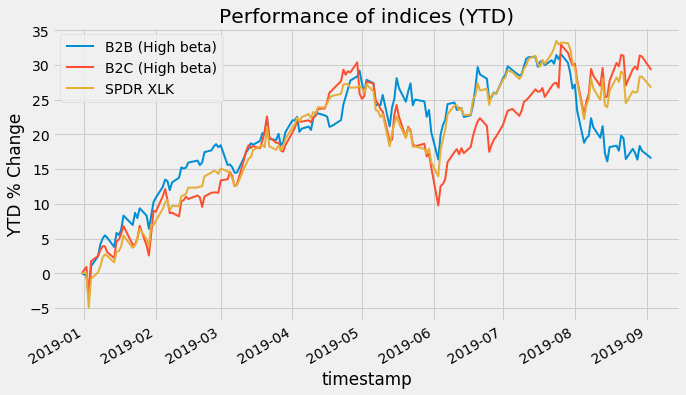

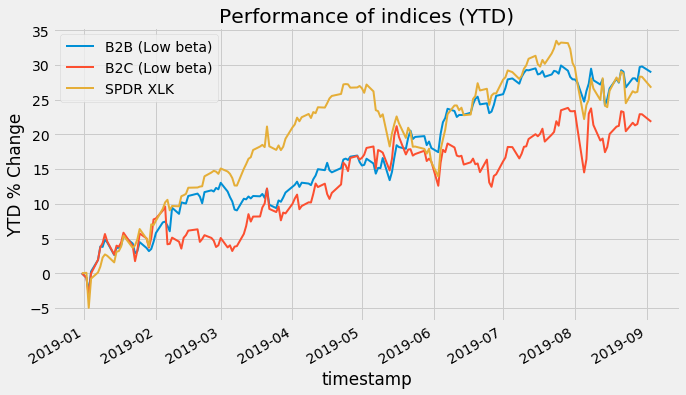

In [23]:
def graph_performance(c, label=''):
    ax = (c[['B2B_IDX_YTD','B2C_IDX_YTD']]*100).plot(linewidth=2, linestyle='solid',figsize=(10,6))
    (c[['SPY_YTD']]*100).plot(linewidth=2, linestyle='solid', ax=ax)
    plt.legend(['B2B (%s beta)' % label,'B2C (%s beta)' % label,'SPDR XLK'])
    plt.ylabel('YTD % Change')

    if YTD:
        plt.title('Performance of indices (YTD)')
    else:
        plt.title('Performance of indices (1 Year)')

graph_performance(HIGH_BETA, 'High')
graph_performance(LOW_BETA, 'Low')

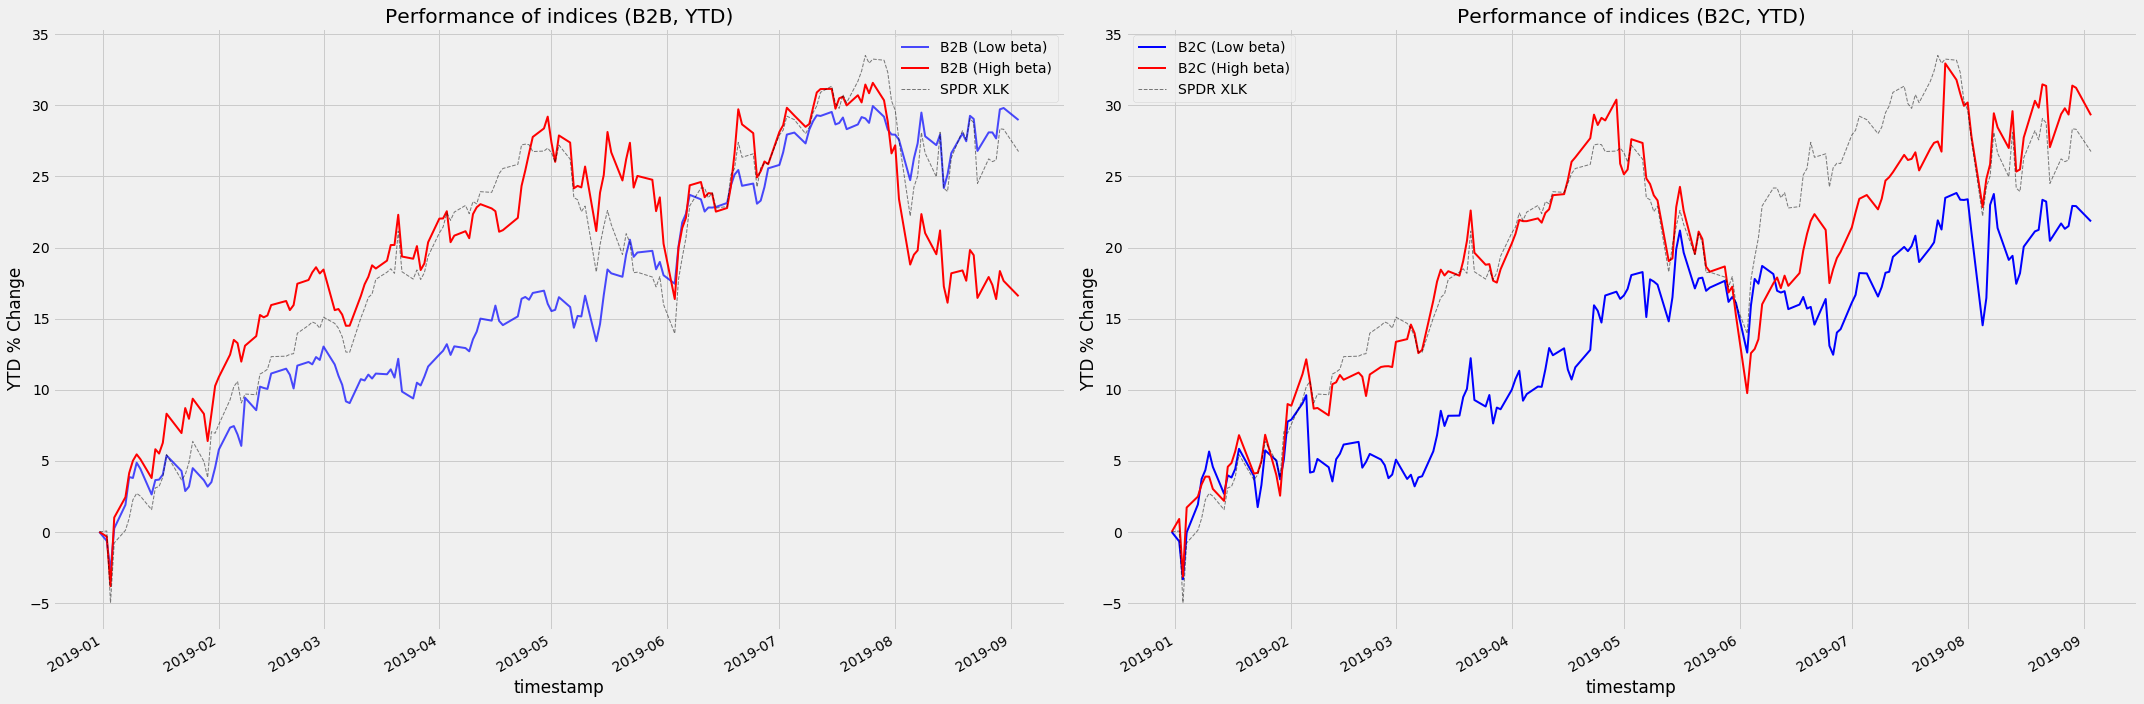

In [24]:
fig = plt.figure(figsize=(30,10))
ax_1 = plt.subplot2grid((1,2),(0,0))
ax_2 = plt.subplot2grid((1,2),(0,1))

(LOW_BETA[['B2B_IDX_YTD']]*100).plot(linewidth=2, linestyle='solid', c='blue', alpha=0.7, ax=ax_1)
(HIGH_BETA[['B2B_IDX_YTD']]*100).plot(linewidth=2, linestyle='solid', ax=ax_1, c='red')
(LOW_BETA[['SPY_YTD']]*100).plot(linewidth=1, linestyle='dashed', ax=ax_1, c='k', alpha=0.5)
ax_1.legend(['B2B (Low beta)','B2B (High beta)','SPDR XLK'])
ax_1.set_ylabel('YTD % Change')

if YTD:
    ax_1.set_title('Performance of indices (B2B, YTD)')
else:
    ax_1.set_title('Performance of indices (B2B, 1 Year)')
    
(LOW_BETA[['B2C_IDX_YTD']]*100).plot(linewidth=2, linestyle='solid', c='blue', ax=ax_2)
(HIGH_BETA[['B2C_IDX_YTD']]*100).plot(linewidth=2, linestyle='solid', c='red', ax=ax_2)
(LOW_BETA[['SPY_YTD']]*100).plot(linewidth=1, linestyle='dashed', c='k', alpha=0.5, ax=ax_2)
ax_2.legend(['B2C (Low beta)','B2C (High beta)','SPDR XLK'])
ax_2.set_ylabel('YTD % Change')

if YTD:
    ax_2.set_title('Performance of indices (B2C, YTD)')
else:
    ax_2.set_title('Performance of indices (B2C, 1 Year)')
    
plt.tight_layout()

# Anualised volatility

In [25]:
(LOW_BETA[['B2B_IDX_DAILY','B2C_IDX_DAILY', 'SPY_YTD_DAILY']]).std() * np.sqrt(252) * 100

B2B_IDX_DAILY    15.091741
B2C_IDX_DAILY    22.483826
SPY_YTD_DAILY    19.950526
dtype: float64

In [26]:
(HIGH_BETA[['B2B_IDX_DAILY','B2C_IDX_DAILY', 'SPY_YTD_DAILY']]).std() * np.sqrt(252) * 100

B2B_IDX_DAILY    21.423939
B2C_IDX_DAILY    23.486359
SPY_YTD_DAILY    19.950526
dtype: float64

## Caluclate market Betas (Only works with SPY)

In [190]:
b2b_betas = (CLOSES.iloc[:,0:15].astype('float64').cov()/CLOSES.iloc[:,14].astype('float64').var()).iloc[:,14]
b2c_betas = (CLOSES_COMPARISON.iloc[:,0:15].astype('float64').cov()/CLOSES_COMPARISON.iloc[:,14].astype('float64').var()).iloc[:,14]

print('B2B beta: %.2f' % b2b_betas.mean())
print('B2C beta: %.2f' % b2c_betas.mean())

B2B beta: 0.66
B2C beta: 0.92


## Filter Returns by Day (Event Search)

In [49]:
(HIGH_BETA[HIGH_BETA.index == '26-08-2019'][['SPY_YTD_DAILY']]*100)

,SPY_YTD_DAILY
timestamp,
2019-08-26,1.377024


In [13]:
PCT_CHANGES = calculate_weighted_percentage_changes(CLOSES, WEIGHTS, periods=1)

//anaconda/envs/citadel/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


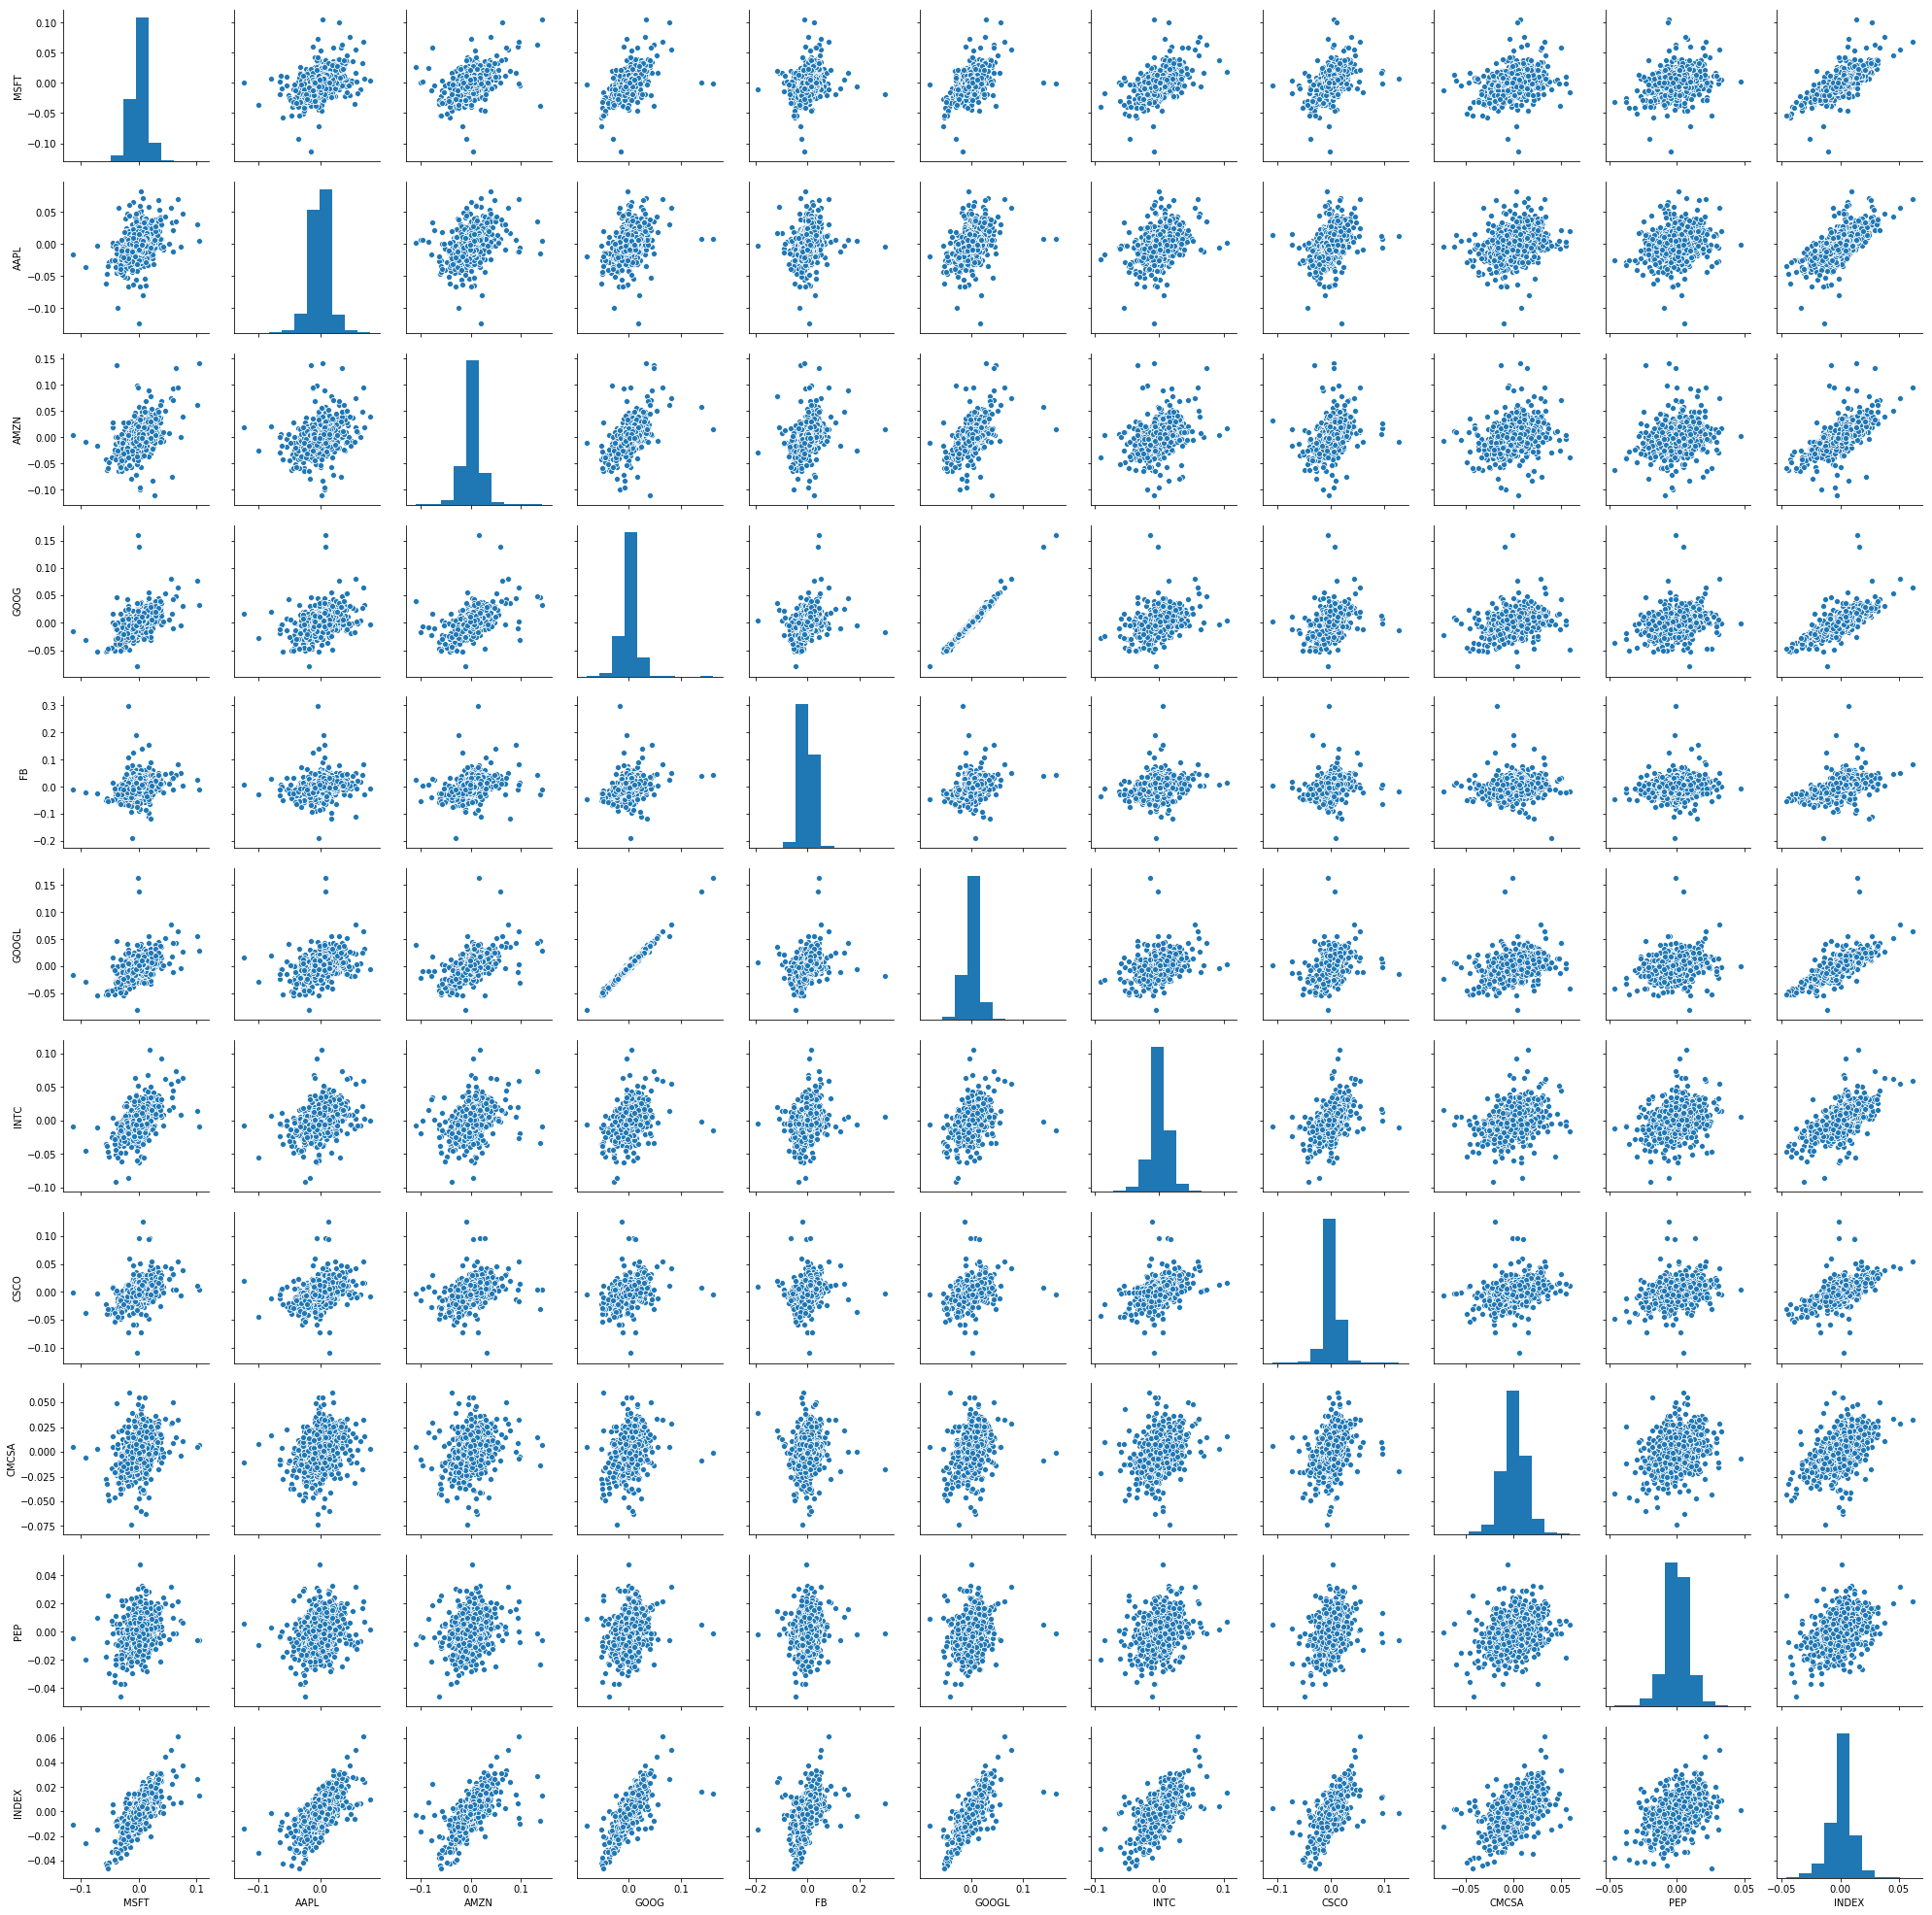

In [14]:
sns.pairplot(PCT_CHANGES)

## Building a regression model to predict pct change in Nasdaq
Since we have some highly correlated variables - which below explain 91.9% of variance in the nasdaq lets see how well we can use this to predict daily moves in teh nasdaq

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
PCT_CHANGES = PCT_CHANGES[PCT_CHANGES.index >= '2016-01-01']
X = PCT_CHANGES.drop(columns='INDEX')
Y = PCT_CHANGES['INDEX']

sc = StandardScaler()
X_norm = sc.fit_transform(X)

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
from statsmodels.api import OLS
OLS(Y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDEX   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:36:43   Log-Likelihood:                 2673.1
No. Observations:                 577   AIC:                            -5326.
Df Residuals:                     567   BIC:                            -5283.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MSFT           0.1546      0.013     11.856      0.000       0.129       0.180
AAPL           0.1616      0.009     17.525      0.000       0.143       0.180
AMZN           0.0941      0.008     11.101      0.000       0.077       0.111
GOOG           0.0749      0.056      1.332      0.183      -0.036       0.185
FB             0.0845      0.007     11.855      0.000       0.071       0.099
GOOGL          0.0697      0.056      1.240      0.216      -0.041       0.180
INTC           0.0854      0.008     10.069      0.000       0.069       0.102
CSCO           0.0970      0.010      9.414      0.000       0.077       0.117
CMCSA          0.0683      0.008      8.788      0.000       0.053       0.084
PEP            0.0249      0.012      2.163      0.031       0.002       0.047
==============================================================================
Omnibus:                      124.864   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              950.653
Skew:                          -0.724   Prob(JB):                    3.70e-207
Kurtosis:                       9.119   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(-0.06, 0.06)

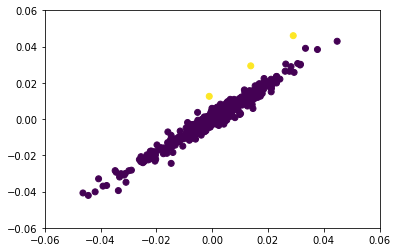

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

THRESHOLD = 0.01
anomalous = (np.abs(y_pred - Y) > THRESHOLD)

plt.scatter(Y, y_pred, c=anomalous)
plt.xlim((-0.06,0.06))
plt.ylim((-0.06,0.06))

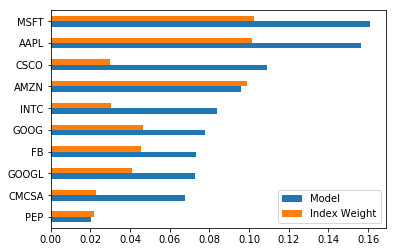

In [20]:
coefs = pd.DataFrame(model.coef_).T
coefs.columns = CLOSES.columns[:-1]
coefs = coefs.append(pd.DataFrame(WEIGHTS))
coefs = coefs.T
coefs.columns = ['Model', 'Index Weight']
coefs['Relative Weight'] = coefs['Model'] / coefs['Index Weight']
coefs = coefs.sort_values(by='Model', ascending=True)
coefs[['Model', 'Index Weight']].plot(kind='barh')

## Identifying anomalies

In [21]:

UNCHANGED_THRESHOLD = 0.01

# When there is a large difference between the actual and predicted value of the change in the index
# And the index has really responded to the change

anomalies = PCT_CHANGES[(np.abs(y_pred - Y) > THRESHOLD) & (PCT_CHANGES['INDEX'].abs() < UNCHANGED_THRESHOLD)]
anomalies.columns = CLOSES.columns

In [22]:
predicted = []
predicted.append(CLOSES[PCT_CHANGES.index[0]:]['close'][PCT_CHANGES.index[0]])

for i in y_pred:
    predicted.append(predicted[-1] * (1 + i))

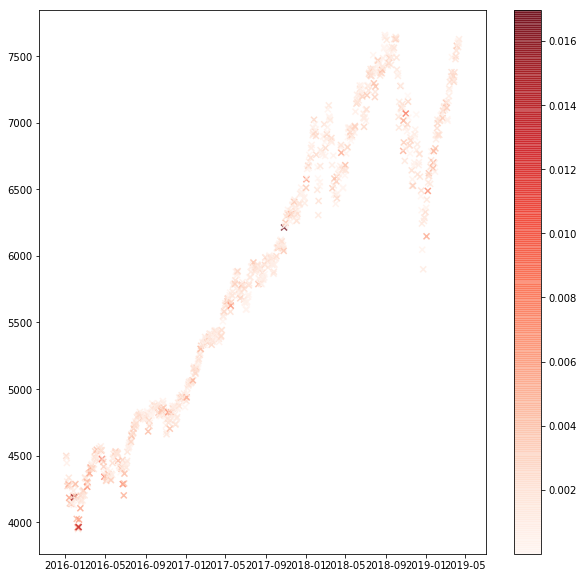

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(CLOSES.index[CLOSES.index >= PCT_CHANGES.index[0]], CLOSES['close'][PCT_CHANGES.index[0]:], c=np.abs(y_pred - Y), cmap='Reds', alpha=.7, marker='x')
plt.colorbar()

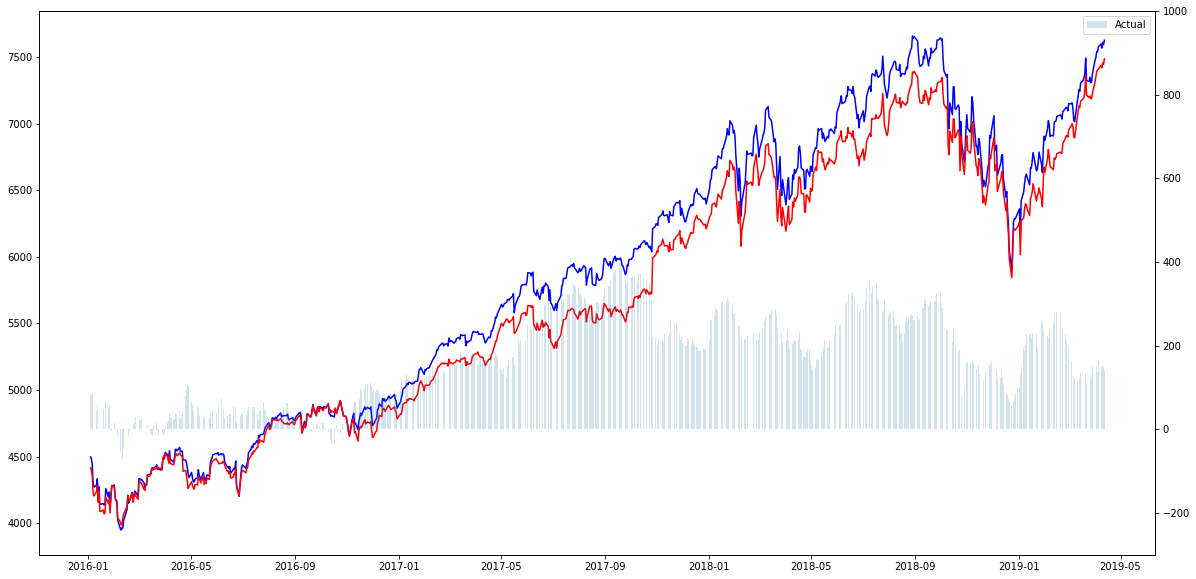

In [24]:
plt.figure(figsize=(20,10))
actual_close = CLOSES['close'][CLOSES.index >= PCT_CHANGES.index[0]]
predicted_close = predicted[1:]
idx = CLOSES.index[CLOSES.index >= PCT_CHANGES.index[0]]

ax = plt.subplot()

ax.plot(idx, actual_close, c='b')
ax.plot(idx, predicted_close, c='r')

ax_2 = ax.twinx()
ax_2.bar(idx, actual_close - predicted_close, alpha=0.2)
ax_2.set_ylim(-300,1000)

plt.legend(['Actual', 'Predicted'])

In [25]:
((predicted_close - actual_close)**2).sum()/len(predicted_close)

40518.854594322765

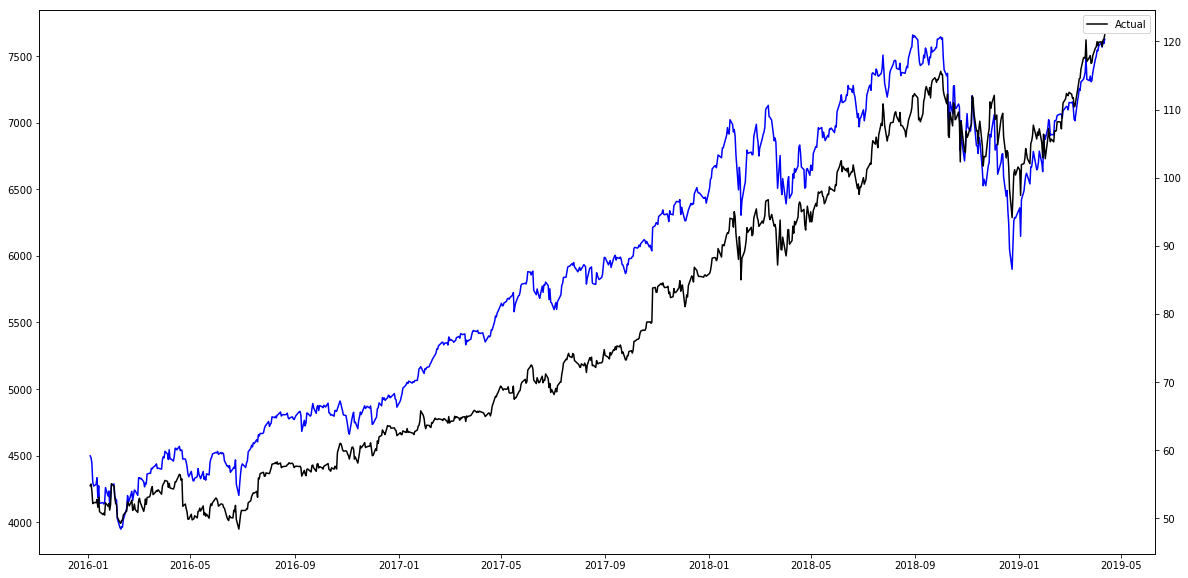

In [26]:
plt.figure(figsize=(20,10))
actual_close = CLOSES['close'][CLOSES.index >= PCT_CHANGES.index[0]]
predicted_close = predicted[1:]
apple_close = CLOSES['MSFT'][CLOSES.index >= PCT_CHANGES.index[0]]
idx = CLOSES.index[CLOSES.index >= PCT_CHANGES.index[0]]

ax = plt.subplot()

ax.plot(idx, actual_close, c='b')
# ax.plot(idx, predicted_close, c='r')
ax.twinx().plot(idx, apple_close, c='k')

# ax_2 = ax.twinx()
# ax_2.bar(idx, actual_close - predicted_close, alpha=0.2)
# ax_2.set_ylim(-300,1000)

plt.legend(['Actual', 'Predicted'])

In [27]:
def get_quote_for_bund():
    quote = pd.read_json('./euro_usd.json')
    quote['t'] = pd.to_datetime(quote['t'], unit='s')
    quote = quote.set_index('t')
    return quote

euro_bund = get_quote_for_bund()

In [28]:
euro_bund.tail()

,c,o,h,l,v,vo,s
t,,,,,,,
2019-06-13,1.12770,1.12870,1.1305,1.1268,82342,0,ok
2019-06-14,1.12090,1.12820,1.1291,1.1202,69775,0,ok
2019-06-17,1.12180,1.12150,1.1247,1.1203,55650,0,ok
2019-06-18,1.11985,1.12250,1.1243,1.1181,65195,0,ok
2019-06-19,1.12030,1.11975,1.1206,1.1187,24749,0,ok


In [29]:
euro_bund_rolling = euro_bund['c'].pct_change(periods=365).dropna()

In [30]:
bund_nasdaq = pd.DataFrame({
    'NASDAQ_CLOSE': CLOSES['close'][CLOSES.index.isin(euro_bund_rolling.index)],
    'BUND_OPEN': euro_bund_rolling
})

bund_nasdaq = bund_nasdaq.astype('float64').dropna()

In [31]:
bund_nasdaq.corr()

,NASDAQ_CLOSE,BUND_OPEN
NASDAQ_CLOSE,1.000000,0.498405
BUND_OPEN,0.498405,1.000000


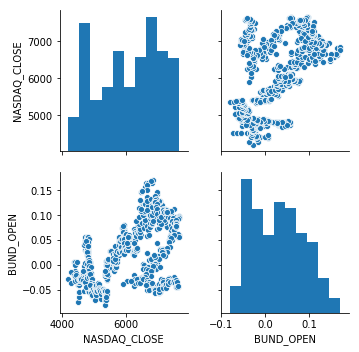

In [32]:
sns.pairplot(bund_nasdaq)

In [33]:
PCT_CHANGES_BUND = PCT_CHANGES.merge(right=pd.DataFrame(bund_nasdaq['BUND_OPEN']), how='inner', left_index=True, right_index=True)

In [34]:
X = PCT_CHANGES_BUND.drop(columns=['INDEX'])
Y = PCT_CHANGES_BUND['INDEX']

sc = StandardScaler()
X_norm = sc.fit_transform(X)

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [35]:
from statsmodels.api import OLS
OLS(Y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDEX   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1120.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:36:49   Log-Likelihood:                 2414.4
No. Observations:                 506   AIC:                            -4807.
Df Residuals:                     495   BIC:                            -4760.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MSFT           0.1738      0.013     13.608      0.000       0.149       0.199
AAPL           0.1353      0.009     15.127      0.000       0.118       0.153
AMZN           0.1221      0.009     12.899      0.000       0.103       0.141
GOOG           0.0778      0.056      1.389      0.166      -0.032       0.188
FB             0.0765      0.007     11.592      0.000       0.064       0.089
GOOGL          0.0690      0.055      1.256      0.210      -0.039       0.177
INTC           0.0841      0.008     10.531      0.000       0.068       0.100
CSCO           0.1026      0.011      9.689      0.000       0.082       0.123
CMCSA          0.0685      0.007      9.177      0.000       0.054       0.083
PEP            0.0191      0.011      1.789      0.074      -0.002       0.040
BUND_OPEN     -0.0019      0.001     -1.315      0.189      -0.005       0.001
==============================================================================
Omnibus:                       10.604   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.790
Skew:                           0.122   Prob(JB):                     0.000226
Kurtosis:                       3.858   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

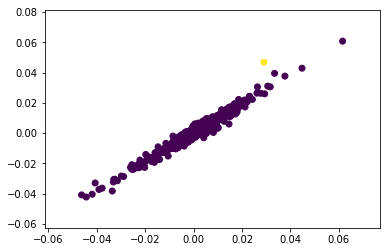

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

THRESHOLD = 0.01
anomalous = (np.abs(y_pred - Y) > THRESHOLD)

plt.scatter(Y, y_pred, c=anomalous)

predicted = []
predicted.append(CLOSES[PCT_CHANGES_BUND.index[0]:]['close'][PCT_CHANGES_BUND.index[0]])

for i in y_pred:
    predicted.append(predicted[-1] * (1 + i))

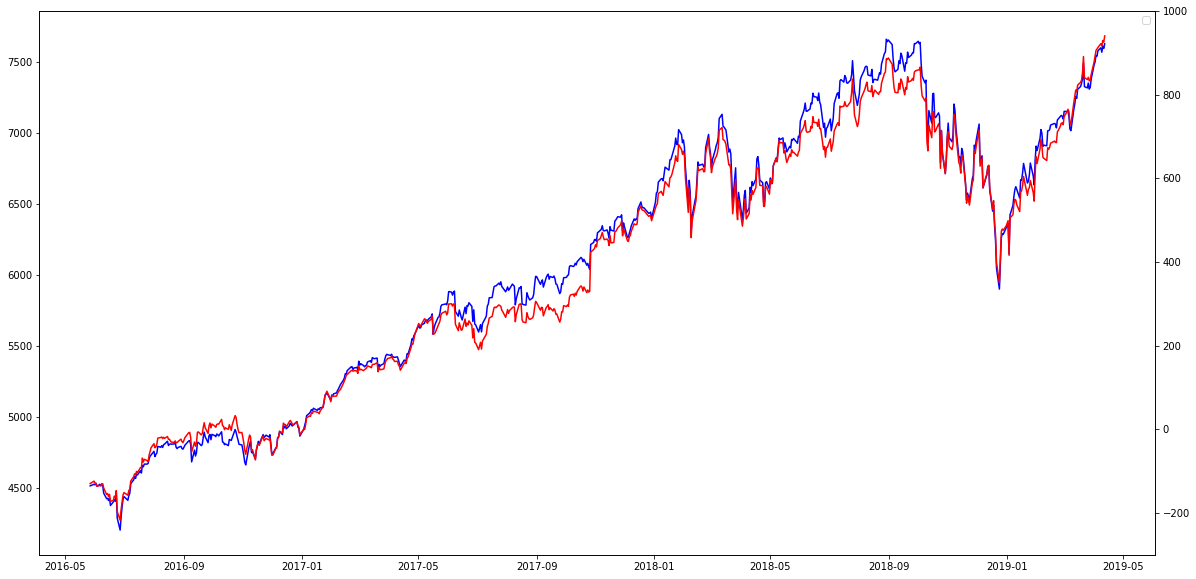

In [37]:
plt.figure(figsize=(20,10))
actual_close = CLOSES['close'][CLOSES.index.isin(PCT_CHANGES_BUND.index)]
predicted_close = predicted[1:]
idx = CLOSES.index[CLOSES.index.isin(PCT_CHANGES_BUND.index)]

ax = plt.subplot()

ax.plot(idx, actual_close, c='b')
ax.plot(idx, predicted_close, c='r')

ax_2 = ax.twinx()
# ax_2.bar(idx, actual_close - predicted_close, alpha=0.2)
ax_2.set_ylim(-300,1000)

plt.legend(['Actual', 'Predicted'])

In [813]:
((predicted_close - actual_close)**2).sum()/len(predicted_close)

9166.376848280242

In [814]:
40518.85459432271-9166.376848280242

31352.477746042467

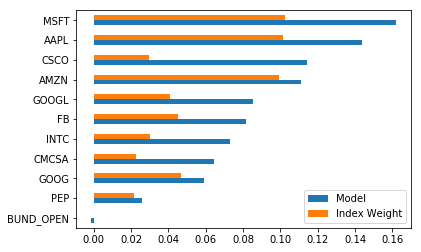

In [815]:
coefs = pd.DataFrame(model.coef_).T
coefs.columns = X.columns
coefs = coefs.append(pd.DataFrame(WEIGHTS))
coefs = coefs.T
coefs.columns = ['Model', 'Index Weight']
coefs['Relative Weight'] = coefs['Model'] / coefs['Index Weight'] 
coefs = coefs.sort_values(by='Model', ascending=True)
coefs[['Model', 'Index Weight']].plot(kind='barh')

In [39]:
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Input, LSTM, SimpleRNN, BatchNormalization
from keras.regularizers import l2
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf

In [296]:
def model(shape):
    X = Input(shape=(shape[1],))
#     DENSE_1 = Dense(4, activation='relu')(X)
#     DENSE_2 = Dense(4, activation='relu')(DENSE_1)
#     DENSE_3 = Dense(2, activation='relu')(DENSE_2)
    out = Dense(1, activation='linear')(X)

    model = Model(inputs=[X], outputs=out)
    
    return model

In [297]:
X_train.shape

(506, 11)

In [298]:
model = model(X_train.shape)

In [299]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 11)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [300]:
opt = Adam(lr=0.001)
model.compile(opt, loss='MSE', metrics=['MSE'])

In [304]:
history = model.fit(X_train, Y_train, epochs=200,initial_epoch=0)

Epoch 1/200
506/506 [==============================] - 0s 44us/step - loss: 1.5453e-05 - mean_squared_error: 1.5453e-05
Epoch 2/200
506/506 [==============================] - 0s 38us/step - loss: 1.4844e-05 - mean_squared_error: 1.4844e-05
Epoch 3/200
506/506 [==============================] - 0s 40us/step - loss: 1.4249e-05 - mean_squared_error: 1.4249e-05
Epoch 4/200
506/506 [==============================] - 0s 46us/step - loss: 1.3659e-05 - mean_squared_error: 1.3659e-05
Epoch 5/200
506/506 [==============================] - 0s 38us/step - loss: 1.3122e-05 - mean_squared_error: 1.3122e-05
Epoch 6/200
506/506 [==============================] - 0s 39us/step - loss: 1.2617e-05 - mean_squared_error: 1.2617e-05
Epoch 7/200
506/506 [==============================] - 0s 38us/step - loss: 1.2085e-05 - mean_squared_error: 1.2085e-05
Epoch 8/200
506/506 [==============================] - 0s 37us/step - loss: 1.1628e-05 - mean_squared_error: 1.1628e-05
Epoch 9/200
506/506 [===================

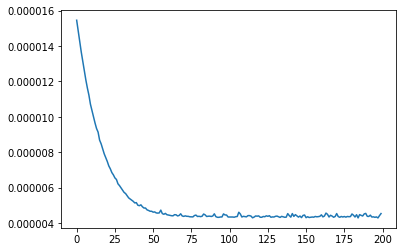

In [305]:
plt.plot(history.history['loss'])

In [306]:


predicted = []
predicted.append(CLOSES[PCT_CHANGES_BUND.index[0]:]['close'][PCT_CHANGES_BUND.index[0]])

for i in model.predict(X).flatten():
    predicted.append(predicted[-1] * (1 + i))

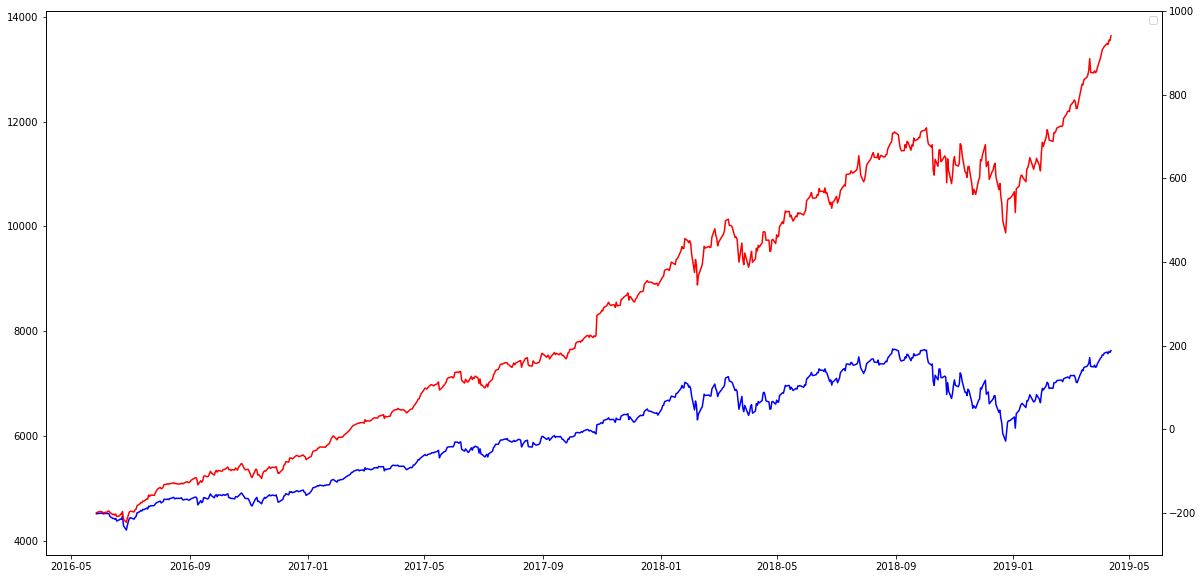

In [307]:
plt.figure(figsize=(20,10))
actual_close = CLOSES['close'][CLOSES.index.isin(PCT_CHANGES_BUND.index)]
predicted_close = predicted[1:]
idx = CLOSES.index[CLOSES.index.isin(PCT_CHANGES_BUND.index)]

ax = plt.subplot()

ax.plot(idx, actual_close, c='b')
ax.plot(idx, predicted_close, c='r')

ax_2 = ax.twinx()
# ax_2.bar(idx, actual_close - predicted_close, alpha=0.2)
ax_2.set_ylim(-300,1000)

plt.legend(['Actual', 'Predicted'])

In [308]:
model.predict(X).flatten()

array([ 5.02981525e-03,  4.78471722e-03, -1.90968195e-03,  2.29981611e-04,
       -3.80818546e-03,  2.17720214e-03,  6.44361833e-04,  4.05355543e-03,
        3.77541000e-04, -5.84675139e-03, -9.19426698e-03,  2.34088628e-03,
       -4.52000368e-03,  4.76859277e-03, -1.06643485e-02,  2.72024609e-03,
        7.96461292e-03, -1.57121557e-03,  1.23760244e-02, -3.30295227e-02,
       -1.29725281e-02,  1.80100910e-02,  1.38264671e-02,  1.22688944e-02,
        4.42149444e-03, -3.30548966e-03,  8.70872010e-03,  2.55849911e-03,
        1.44952266e-02,  7.71099888e-03,  5.34634944e-03, -6.68789493e-04,
        6.59841066e-03, -7.91430706e-04,  8.85253958e-03, -3.07215494e-04,
        1.63101628e-02, -5.52829122e-03,  5.38239954e-03, -9.23028681e-04,
        1.68268452e-05,  1.00526437e-02,  6.10540155e-03,  7.06777582e-03,
        7.75977550e-03, -5.13412245e-03,  1.03250099e-03,  5.33381430e-03,
        9.38264467e-03,  1.40291511e-03,  1.43532339e-03, -1.57137529e-03,
        2.81688059e-03, -

In [120]:
Y_test.shape

(218,)

In [124]:
Y_test.index

DatetimeIndex(['2017-05-10', '2018-02-09', '2017-03-13', '2017-08-11',
               '2016-08-25', '2017-09-21', '2016-06-10', '2017-08-23',
               '2016-08-11', '2019-03-12',
               ...
               '2019-02-25', '2018-10-01', '2018-11-27', '2018-06-12',
               '2017-02-01', '2018-09-25', '2018-05-23', '2018-06-05',
               '2017-12-12', '2018-06-13'],
              dtype='datetime64[ns]', length=218, freq=None)